In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [125]:
df_raw = pd.read_csv("../Data/cleaned_food.csv")
df = df_raw.groupby("food").mean(numeric_only=True).reset_index().round()
df.head()

,food,calories,protein,fat,carbs,fiber,sugar
0,air_kelapa,19.0,1.0,0.0,4.0,1.0,3.0
1,alpukat,160.0,2.0,15.0,9.0,7.0,1.0
2,anggur,68.0,1.0,0.0,18.0,1.0,15.0
3,apel,52.0,0.0,0.0,14.0,2.0,10.0
4,ayam_goreng,243.0,27.0,15.0,0.0,0.0,0.0


In [126]:
df.duplicated().sum()
duplicated = df.drop_duplicates()

In [127]:
duplicated = df.drop_duplicates()# mengganti spasi dengan under score
df['food'] = df['food'].str.strip().str.lower().str.replace(" ", "_")

In [128]:
df.head()

,food,calories,protein,fat,carbs,fiber,sugar
0,air_kelapa,19.0,1.0,0.0,4.0,1.0,3.0
1,alpukat,160.0,2.0,15.0,9.0,7.0,1.0
2,anggur,68.0,1.0,0.0,18.0,1.0,15.0
3,apel,52.0,0.0,0.0,14.0,2.0,10.0
4,ayam_goreng,243.0,27.0,15.0,0.0,0.0,0.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   food      99 non-null     object 
 1   calories  99 non-null     float64
 2   protein   99 non-null     float64
 3   fat       99 non-null     float64
 4   carbs     99 non-null     float64
 5   fiber     99 non-null     float64
 6   sugar     99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.5+ KB


In [130]:
df.dtypes

food         object
calories    float64
protein     float64
fat         float64
carbs       float64
fiber       float64
sugar       float64
dtype: object

In [131]:
df.describe()

,calories,protein,fat,carbs,fiber,sugar
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,201.818182,8.878788,9.777778,20.383838,2.050505,7.545455
std,160.630350,8.661754,15.171506,21.056633,2.932484,15.056542
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,2.000000,0.000000,5.000000,0.000000,1.000000
50%,173.000000,6.000000,6.000000,12.000000,1.000000,3.000000
75%,291.000000,13.000000,13.000000,27.000000,2.000000,6.500000
max,891.000000,32.000000,100.000000,100.000000,16.000000,101.000000


In [132]:
df = df[df["calories"] >= 0]
df = df[df["carbs"] >= 0]
df = df[df["sugar"] >= 0]
df = df[df["fiber"] >= 0]
df = df[df["protein"] >= 0]

In [133]:
num_features = ["protein","fat",
                "carbs",
                "fiber","sugar"]


In [134]:
def checking_outlier(list_feature, df, dataset_name):
    outlier_info = []

    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })

    if len(outlier_info) == 0:
        print("✅ No outliers detected in the selected features.")
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df, dataset_name="Data")

,Feature,Outlier Count
0,protein,1
1,fat,6
2,carbs,7
3,fiber,7
4,sugar,13


In [135]:
def remove_outliers_iqr(df, list_feature):
    df_clean = df.copy()
    for feature in list_feature:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter hanya nilai dalam batas
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]

    print(f"✅ Outliers removed. Remaining rows: {len(df_clean)} / {len(df)}")
    return df_clean

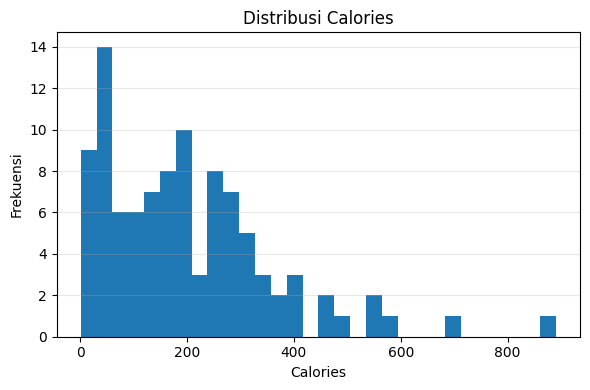

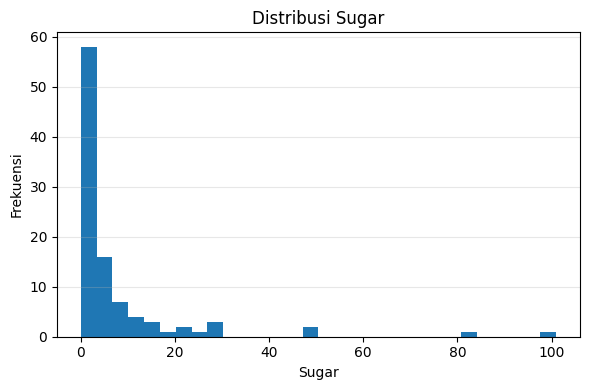

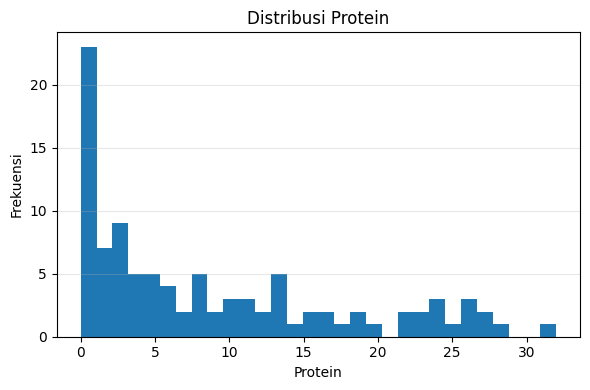

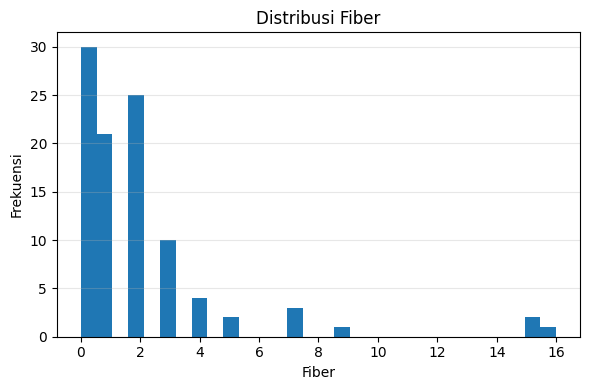

In [136]:

cols = ["calories", "sugar", "protein", "fiber"]

def plot_distribution(df, columns, bins=30):
    for col in columns:
        plt.figure(figsize=(6, 4))
        plt.hist(df[col].dropna(), bins=bins)
        plt.title(f"Distribusi {col.capitalize()}")
        plt.xlabel(col.capitalize())
        plt.ylabel("Frekuensi")
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_distribution(df, cols)


In [137]:
from sklearn.model_selection import train_test_split

X = df[["protein", "fat", "carbs","fiber","sugar"]]
y = df["calories"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [138]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=100,random_state=42)
model1.fit(X_train, y_train)

y_pred1=model1.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R2 :", r2_score(y_test, y_pred1))

MAE: 21.403750000000002
MSE: 1171.39184125
R2 : 0.9459594080890066


In [139]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2=model2.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R2 :", r2_score(y_test, y_pred2))

MAE: 5.027691918946452
MSE: 77.81121577334685
R2 : 0.9964102838950811


In [140]:
from sklearn.neighbors import KNeighborsRegressor

model3 = KNeighborsRegressor(n_neighbors=5)

model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))
print("R2 :", r2_score(y_test, y_pred3))

MAE: 31.03000000000001
MSE: 3779.2700000000004
R2 : 0.8256484460626594


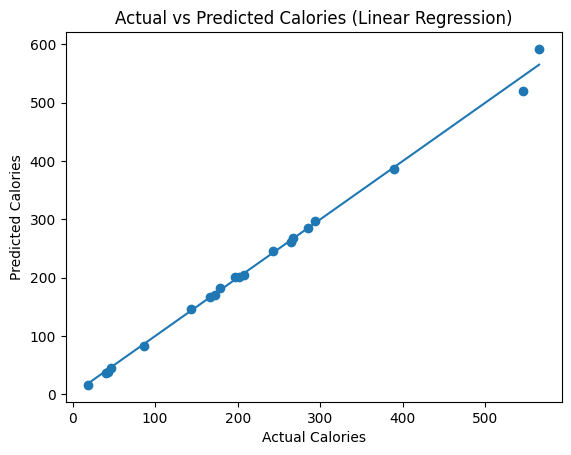

In [141]:
plt.figure()
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (Linear Regression)")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.show()


In [142]:
df["predicted_calories"] = model2.predict(X)
df.to_csv("../output/predicted_food.csv", index=False)

In [143]:
import joblib
joblib.dump(model2, "../models/calorie_model.pkl")

['../models/calorie_model.pkl']